Calculated angle for rotation: 8.999999339831405 degrees


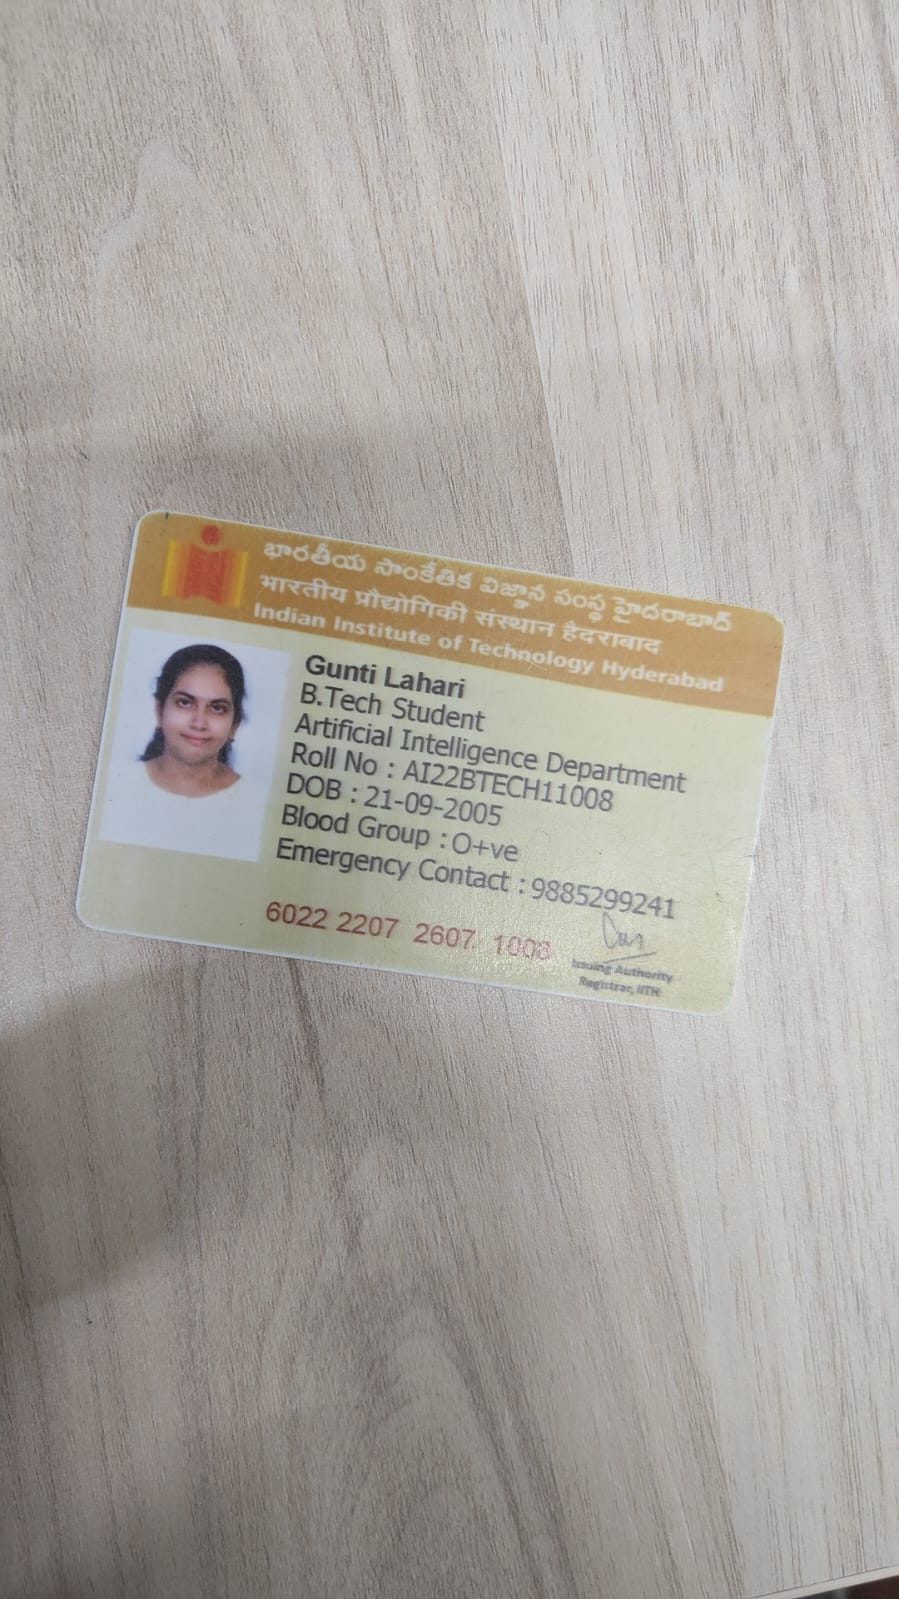

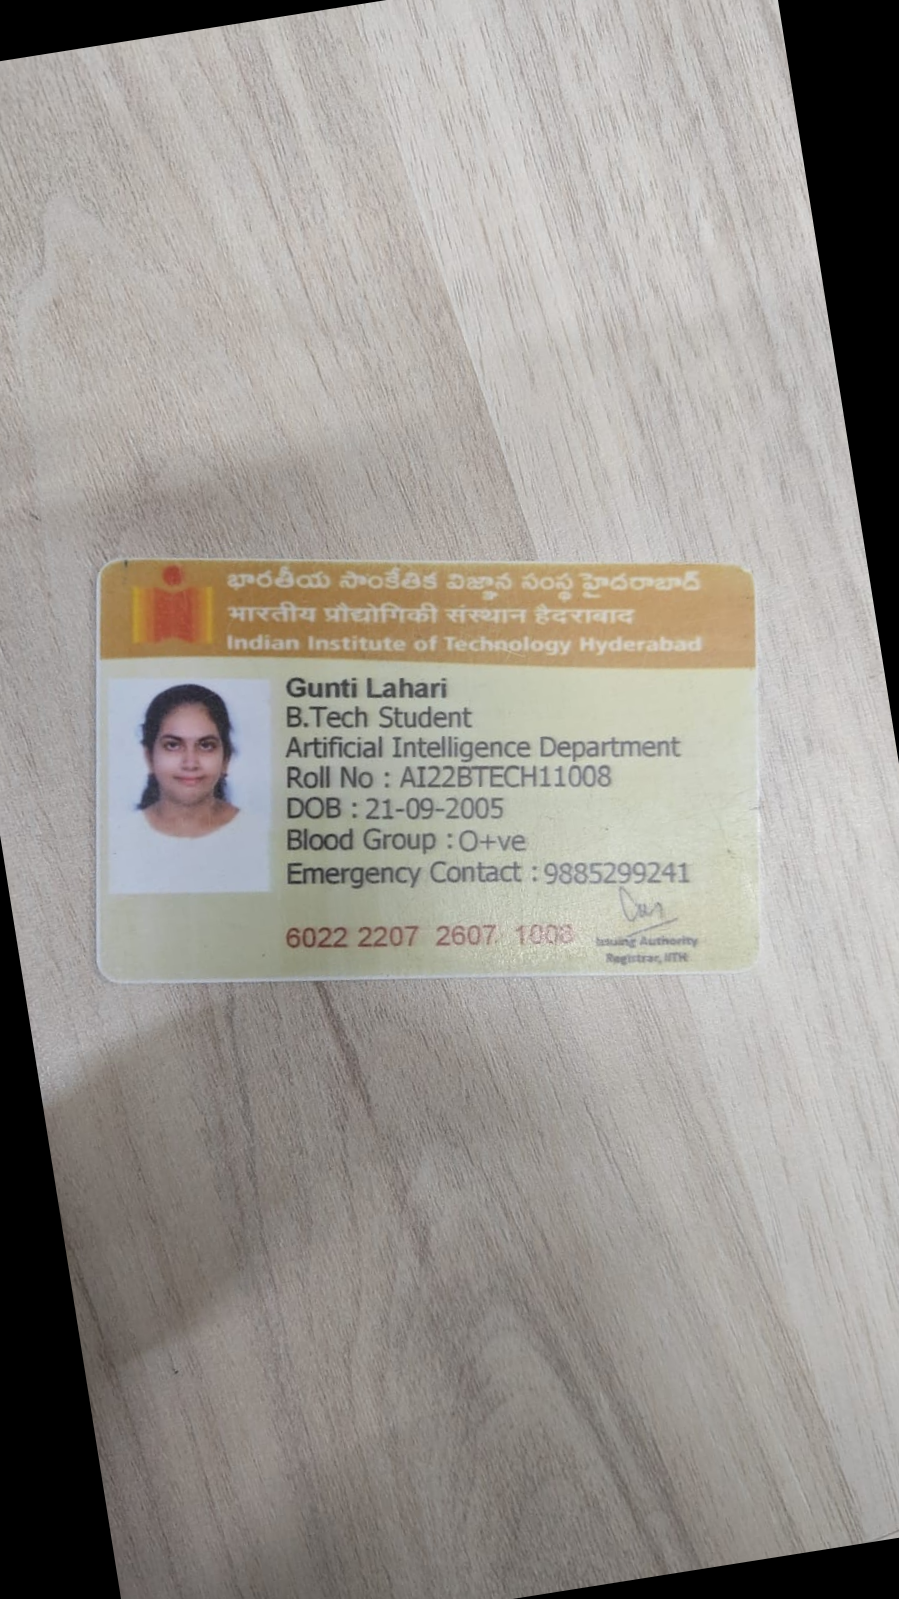

True

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def rotate_image(image, angle):
    """Rotate image by the given angle."""
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h))
    return rotated_image

def correct_image_rotation(image):
    """Correct the rotation of the ID card using the Hough Transform."""
    # Step 1: Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Step 2: Apply Gaussian blur to reduce noise and improve edge detection
    blurred_image = cv2.GaussianBlur(gray, (5, 5), 0)

    # Step 3: Apply Canny edge detection with adjusted thresholds to detect edges more effectively in zoomed-out images
    edges = cv2.Canny(blurred_image, 100, 200)

    # Step 4: Apply the Hough Line Transform to detect lines
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 150)  # Adjusted threshold for better detection

    # Step 5: Calculate the average rotation angle based on the detected lines
    angle = 0
    if lines is not None:
        for line in lines:
            rho, theta = line[0]
            angle_in_degrees = (theta * 180 / np.pi) - 90

            # If the angle is greater than 45 degrees, adjust to normalize rotation
            if abs(angle_in_degrees) > 45:
                angle_in_degrees -= 180

            angle += angle_in_degrees

        # Step 6: Calculate the average rotation angle
        angle = angle / len(lines)
        print(f"Calculated angle for rotation: {angle} degrees")
    else:
        print("No lines detected. Image might be too distorted or noisy.")

    # Step 7: Rotate the image by the calculated angle to correct the rotation
    corrected_image = rotate_image(image, angle)
    return corrected_image

# Load the image (replace with your image path)
image_path = '/content/1.jpeg'
image = cv2.imread(image_path)

# Apply the rotation correction
corrected_image = correct_image_rotation(image)

# Display the original and corrected images using cv2_imshow (for Colab compatibility)
cv2_imshow(image)  # Original image
cv2_imshow(corrected_image)  # Corrected image

# Optionally, save the corrected image
cv2.imwrite("corrected_id_card.jpg", corrected_image)


# installations


In [ ]:
!pip install pytesseract


In [ ]:
!pip install pytesseract opencv-python pyzbar


In [ ]:
!apt-get update
!apt-get install -y libzbar0


Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,452 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,172 kB]
Get:10 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,223 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [3,323 kB]
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:13 htt

In [ ]:
!apt-get update
!apt-get install -y tesseract-ocr


Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

#Text Detection

##Logo-detection


Detected 1 face(s): [[147 713  86  86]]


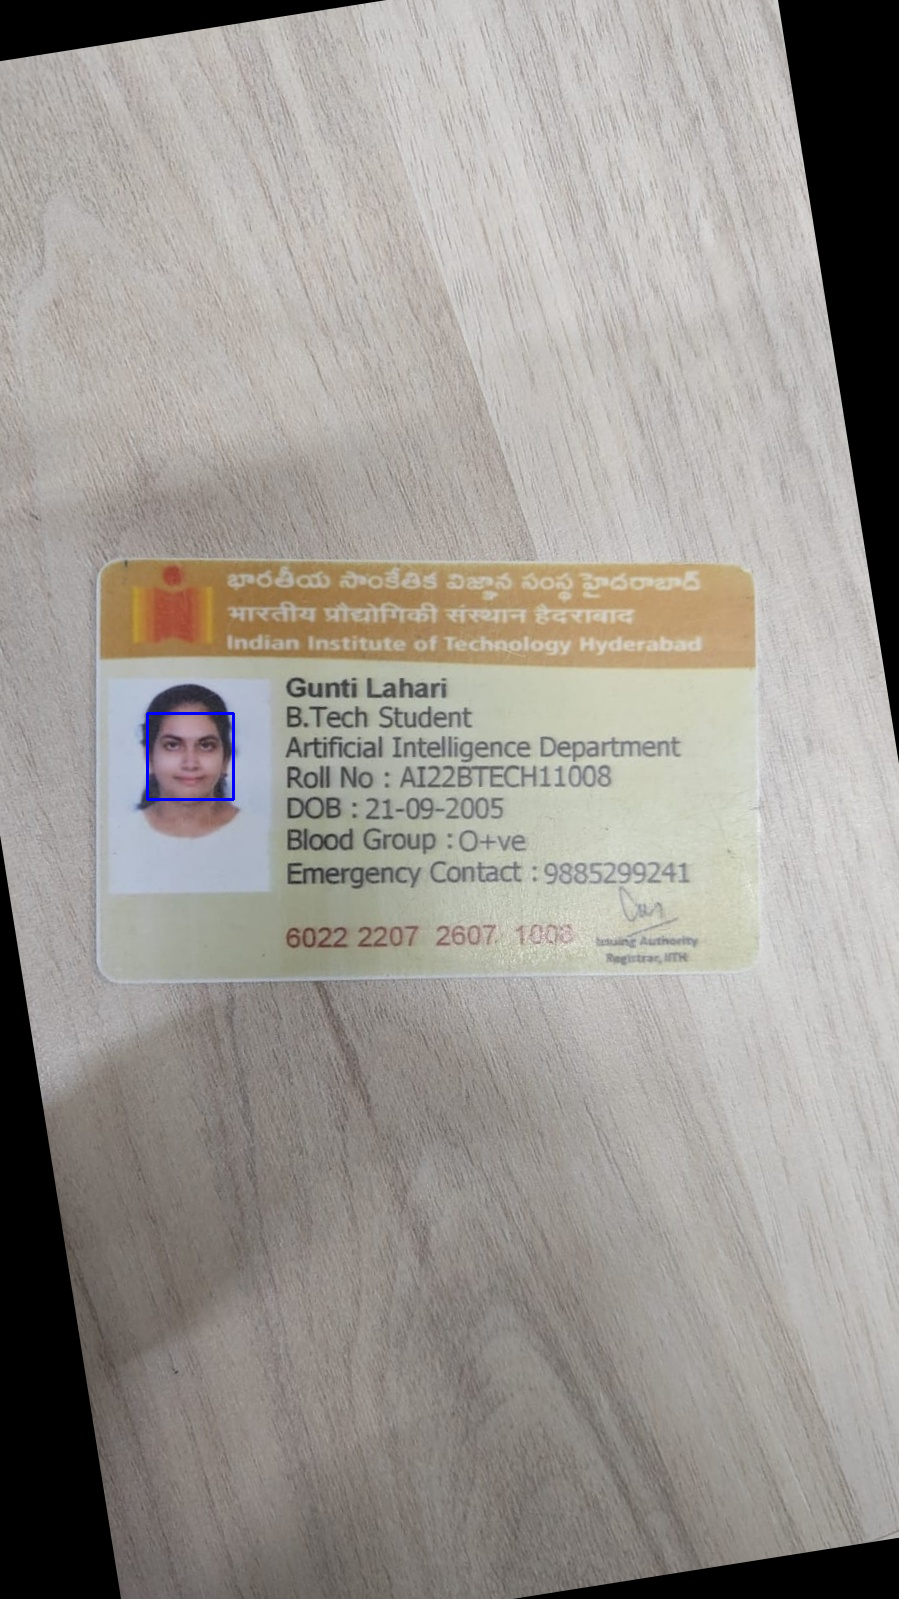

In [ ]:
import cv2

def detect_face_with_haar(image_path):
    """
    Detects faces in an image using Haar cascade features.

    Parameters:
        image_path (str): Path to the input image.

    Returns:
        image_with_faces (ndarray): Image with face bounding boxes drawn.
        face_boxes (list): List of bounding boxes for detected faces [(x, y, w, h)].
    """
    # Load Haar cascade for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image at path {image_path} not found.")

    # Convert to grayscale (Haar works with grayscale images)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces
    face_boxes = face_cascade.detectMultiScale(
        gray_image,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30),
        flags=cv2.CASCADE_SCALE_IMAGE
    )

    # Draw rectangles around detected faces
    for (x, y, w, h) in face_boxes:
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

    return image, face_boxes


def main():
    # Path to the input ID card image
    image_path = '/content/corrected_id_card.jpg'

    # Detect faces
    try:
        image_with_faces, face_boxes = detect_face_with_haar(image_path)

        # Display results
        if len(face_boxes) > 0:
            print(f"Detected {len(face_boxes)} face(s): {face_boxes}")
            cv2_imshow(image_with_faces)


            # Optionally save the result
            cv2.imwrite('detected_faces.jpg', image_with_faces)
        else:
            print("No faces detected.")

    except FileNotFoundError as e:
        print(e)


if __name__ == "__main__":
    main()


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchsummary import summary

import torch.optim as optim
from torch.utils.data import random_split, DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torchvision
from PIL import Image

In [ ]:
class CNNModel(nn.Module):
    def __init__(self, num_classes=10):
        super(CNNModel, self).__init__()

        # Define the layers of the CNN
        # Conv Layer 1
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)


        # Fully connected layers
        self.fc1 = nn.Linear(7*7*64, 100)  # Adjusted input size for fc1
        self.fc2 = nn.Linear(100, 62)  # Output layer

    def forward(self, x):

        x = F.relu(self.conv1(x))
        x = self.pool(self.conv2(x))
        x = F.relu(self.conv2(x)) # Apply ReLU after conv2
        x = self.pool(x)            # Apply pooling after ReLU

        # Flatten the output for the fully connected layers
        x = x.view(-1, 7*7*64) # Adjust flattening to match the output of conv layers
        x = F.relu(self.fc1(x))
        x = self.fc2(x) # Output layer, no activation function here for CrossEntropyLoss

        return x

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL images to tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize with mean=0.5 and std=0.5 (as MNIST is grayscale)
])

# Download the MNIST dataset (train and test)
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create DataLoaders for batching and shuffling
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 49.5MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.84MB/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 14.5MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 8.14MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
from torchvision.datasets.utils import download_url
import os

raw_folder = 'data/EMNIST/raw'

url = 'https://biometrics.nist.gov/cs_links/EMNIST/gzip.zip'
md5 = "58c8d27c78d21e728a6bc7b3cc06412e"

version_numbers = list(map(int, torchvision.__version__.split('+')[0].split('.')))
if version_numbers[0] == 0 and version_numbers[1] < 10:
    filename = "emnist.zip"
else:
    filename = None

os.makedirs(raw_folder, exist_ok=True)

# download files
print('Downloading zip archive')
download_url(url, root=raw_folder, filename=filename, md5=md5)

100%|██████████| 562M/562M [00:04<00:00, 129MB/s]


In [ ]:

# Update the path to where you want the EMNIST dataset to be stored
root_dir = "data/EMNIST/raw/gzip"  # Change this to the actual path

# Load the EMNIST dataset with the 'byclass' split
trainset = torchvision.datasets.EMNIST(
    root=root_dir,
    split="byclass",  # Specify the 'byclass' split
    train=True,
    download=True,  # Download the dataset if not already present
    transform=transforms.ToTensor()  # Transform images to tensors
)

# Load the test dataset for the 'byclass' split
testset = torchvision.datasets.EMNIST(
    root=root_dir,
    split="byclass",  # Specify the 'byclass' split
    train=False,  # Load test data
    download=True,  # Download the dataset if not already present
    transform=transforms.ToTensor()  # Transform images to tensors
)

# Verify the number of classes in the test dataset
print(f"Number of classes in the test dataset: {len(testset.classes)}")



100%|██████████| 562M/562M [00:04<00:00, 115MB/s]


Extracting data/EMNIST/raw/gzip/EMNIST/raw/gzip.zip to data/EMNIST/raw/gzip/EMNIST/raw
Number of classes in the test dataset: 62


In [ ]:
model = CNNModel(62)
summary(model,62 )
print(model)


TypeError: 'int' object is not iterable

In [ ]:
import torch
batch_size = 64
# Check for GPU availability and set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
trainloader = DataLoader(
    trainset,
    batch_size=batch_size,
    shuffle=True )
# Move model to the device (GPU or CPU)
model = model.to(device)

# Training loop with GPU support
train_loss = []
valid_loss = []
test_loss = []
learning_rate = 0.01
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr = learning_rate)
num_epochs = 10
best_val_loss = float('inf')  # Initialize with a very high value
patience = 3  # Number of epochs to wait for improvement
early_stop_counter = 0  # Counter to track epochs without improvement

for epoch in range(num_epochs):
    losses = []
    model.train()  # Ensure the model is in training mode

    for batch_idx, (data, targets) in enumerate(trainloader):
        # Move data and targets to the device
        data, targets = data.to(device), targets.to(device)

        # Forward pass
        scores = model(data)
        loss = criterion(scores, targets)
        losses.append(loss.item())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Compute and store average loss for the epoch
    avg_loss = sum(losses) / len(losses)
    print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}")
    train_loss.append(avg_loss)

model.eval()

Using device: cuda
Epoch 1, Loss: 0.8352
Epoch 2, Loss: 0.7663
Epoch 3, Loss: 0.8021
Epoch 4, Loss: 0.8201
Epoch 5, Loss: 0.8792
Epoch 6, Loss: 0.8913
Epoch 7, Loss: 1.0755
Epoch 8, Loss: 3.6944
Epoch 9, Loss: 3.6899
Epoch 10, Loss: 3.6885


CNNModel(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=62, bias=True)
)

In [ ]:
image_path = "path_to_image.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Known text region (x, y, width, height)
x, y, w, h = 50, 100, 300, 50  # Replace with the actual coordinates
text_region = image[y:y+h, x:x+w]

# Resize if needed (depends on how the model was trained)
text_region = cv2.resize(text_region, (300, 50))

# Normalize pixel values to [0, 1]
text_region = text_region / 255.0

In [ ]:
# Assume fixed-width characters
character_width = 20  # Adjust based on your dataset
characters = []

# Extract each character
for i in range(0, text_region.shape[1], character_width):
    char = text_region[:, i:i+character_width]
    if char.shape[1] == character_width:  # Ensure consistent width
        characters.append(char)

# Convert characters to PyTorch tensors
character_tensors = [
    torch.tensor(c, dtype=torch.float32).unsqueeze(0).unsqueeze(0) for c in characters
]  # Shape: (1, 1, H, W)


In [ ]:
# Load the trained character-classification model
class_to_char = {i: chr(i + 65) for i in range(26)}  # A-Z mapping
class_to_char.update({i + 26: str(i) for i in range(10)})  # Add digits 0-9

model = CNNModel(62)  # Use your CNN model class
model.load_state_dict(torch.load("best_model.pth", map_location=torch.device("cpu")))
model.eval()


In [ ]:
# Define a function to predict a character
def predict_character(model, character_tensor):
    with torch.no_grad():
        output = model(character_tensor)
        predicted_class = torch.argmax(output, dim=1).item()
    return class_to_char[predicted_class]

# Predict the text
predicted_text = ""
for char_tensor in character_tensors:
    predicted_text += predict_character(model, char_tensor)

print(f"Extracted Text: {predicted_text}")


NameError: name 'character_tensors' is not defined

In [ ]:

# Visualize the text region and display the extracted text
plt.imshow(text_region, cmap="gray")
plt.title(f"Extracted Text: {predicted_text}")
plt.axis("off")
plt.show()
